##### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [698]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import pandas_profiling 

import seaborn as sns # Import data visualization library for statistical graphics
import matplotlib.pyplot as plt # Import data visualization library


# ====== For Linear Regression ======

# from scipy.stats import zscore, pearsonr
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm 

import pickle

from yellowbrick.regressor import ResidualsPlot 


# ====== For Logistic Regression ======
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, accuracy_score, classification_report

# ======= Set default style ========

### Multiple output displays per cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>")) # Increase cell width

pd.options.display.float_format = '{:,.2f}'.format # Remove scientific notations to display numbers with 2 decimals

plt.figure(figsize=(12,8))
sns.set_style(style='darkgrid')
%matplotlib inline

# ===== Options =====

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 20) 

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]


<Figure size 864x576 with 0 Axes>

In [214]:
ldf = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
print('* DataF Shape:', ldf.shape)

print('\n* DataF Info:\n')
ldf.info()

print('\n* DataF Describe/Ststs:')
ldf.describe()

print('\n* DataF null values:')
ldf.isna().sum()

print('\n* DataF top 5 rows:')
ldf.head()

isr = np.isreal(ldf).sum() # number of rows and columns (cells) having only real number (numeric) in dataframe ldf
trc = ldf.shape[0] * ldf.shape[1] # number of ALL rows and columns (cells) in the dataframe ldf

print('\n* Number of cells (rows,columns) having non numeric data:', trc - isr)

print('\n* Columns having -ve values:')
(ldf<0).sum()

# From the above, we see that column "Experience" has 52 -ve negative values:
print('\n* 52 Row where Professional "Experience" column have -ve values:') # print 52 such rows
print('* These are Incorrect values or improper Imputations because it cant be -ve:') # print such rows
ldf[ldf.Experience < 0]

* DataF Shape: (5000, 14)

* DataF Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB

* DataF Descr

ID      Age  Experience   Income  ZIP Code   Family    CCAvg  \
count 5,000.00 5,000.00    5,000.00 5,000.00  5,000.00 5,000.00 5,000.00   
mean  2,500.50    45.34       20.10    73.77 93,152.50     2.40     1.94   
std   1,443.52    11.46       11.47    46.03  2,121.85     1.15     1.75   
min       1.00    23.00       -3.00     8.00  9,307.00     1.00     0.00   
25%   1,250.75    35.00       10.00    39.00 91,911.00     1.00     0.70   
50%   2,500.50    45.00       20.00    64.00 93,437.00     2.00     1.50   
75%   3,750.25    55.00       30.00    98.00 94,608.00     3.00     2.50   
max   5,000.00    67.00       43.00   224.00 96,651.00     4.00    10.00   

       Education  Mortgage  Personal Loan  Securities Account  CD Account  \
count   5,000.00  5,000.00       5,000.00            5,000.00    5,000.00   
mean        1.88     56.50           0.10                0.10        0.06   
std         0.84    101.71           0.29                0.31        0.24   
min         1.00      0.00           0.00                0.00        0.00   
25%         1.00      0.00           0.00                0.00        0.00   
50%         2.00      0.00           0.00                0.00        0.00   
75%         3.00    101.00           0.00                0.00        0.00   
max         3.00    635.00           1.00                1.00        1.00   

        Online  CreditCard  
count 5,000.00    5,000.00  
mean      0.60        0.29  
std       0.49        0.46  
min       0.00        0.00  
25%       0.00        0.00  
50%       1.00        0.00  
75%       1.00        1.00  
max       1.00        1.00


* DataF null values:


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


* DataF top 5 rows:


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4   1.60          1         0   
1   2   45          19      34     90089       3   1.50          1         0   
2   3   39          15      11     94720       1   1.00          1         0   
3   4   35           9     100     94112       1   2.70          2         0   
4   5   35           8      45     91330       4   1.00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1


* Number of cells (rows,columns) having non numeric data: 0

* Columns having -ve values:


ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64


* 52 Row where Professional "Experience" column have -ve values:
* These are Incorrect values or improper Imputations because it cant be -ve:


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4411  4412   23          -2      75     90291       2   1.80          2   
4481  4482   25          -2      35     95045       4   1.00          3   
4514  4515   24          -3      41     91768       4   1.00          3   
4582  4583   25          -1      69     92691       3   0.30          3   
4957  4958   29          -1      50     95842       2   1.75          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
89           0              0                   0           0       0   
226          0              0                   0           0       0   
315          0              0                   0           0       1   
451         89              0                   0           0       1   
524          0              0                   0           0       1   
...        ...            ...                 ...         ...     ...   
4411         0              0                   0           0       1   
4481         0              0                   0           0       1   
4514         0              0                   0           0       1   
4582         0              0                   0           0       1   
4957         0              0                   0           0       0   

      CreditCard  
89             1  
226            0  
315            0  
451            0  
524            0  
...          ...  
4411           1  
4481           0  
4514           0  
4582           0  
4957           1  

[52 rows x 14 columns]

##### 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
 Number of unique in each column?
 Number of people with zero mortgage?
 Number of people with zero credit card spending per month?
 Value counts of all categorical columns.
 Univariate and Bivariate
 Get data model ready

In [215]:
# In case you mess up and need to step back, make an Incremental backup copy of the current dataset df:

ldf0 = ldf.copy()  # Make backup 0: Original dataset

# Drop columns: "ID" (all unique) and "ZIP Code" (mostly unique) which wont contribute value to a better model.
ldf.head()  # Before drop
ldf.drop(columns=['ID', 'ZIP Code'], inplace=True)
ldf.head()  # After drop

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4   1.60          1         0   
1   2   45          19      34     90089       3   1.50          1         0   
2   3   39          15      11     94720       1   1.00          1         0   
3   4   35           9     100     94112       1   2.70          2         0   
4   5   35           8      45     91330       4   1.00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4   1.60          1         0              0   
1   45          19      34       3   1.50          1         0              0   
2   39          15      11       1   1.00          1         0              0   
3   35           9     100       1   2.70          2         0              0   
4   35           8      45       4   1.00          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [216]:
# Rename column names for convenience: Convert to lower case:
ldf.rename(str.lower, axis='columns', inplace=True)

# Rename column names for convenience: Shorten / abbreviate them
ldf.rename(columns={'experience': 'expr', 'family': 'fml', 'education': 'edu', 'mortgage': 'mrtg', 
                    'personal loan': 'ploan', 'securities account': 'secac', 'cd account': 'cdac', 
                    'creditcard': 'ccrd'}, inplace=True, errors='raise')

ldf.head()  # Looks good!
ldf1 = ldf.copy()  # Make backup 1: After: 1. Dropped: ID, ZipCode; 2. Columns names a:Shortened, b:lowercased
type(ldf1) 

age  expr  income  fml  ccavg  edu  mrtg  ploan  secac  cdac  online  ccrd
0   25     1      49    4   1.60    1     0      0      1     0       0     0
1   45    19      34    3   1.50    1     0      0      1     0       0     0
2   39    15      11    1   1.00    1     0      0      0     0       0     0
3   35     9     100    1   2.70    2     0      0      0     0       0     0
4   35     8      45    4   1.00    2     0      0      0     0       0     1

pandas.core.frame.DataFrame

In [217]:
# Imputation Needed: Professional Experience cannot be a -ve value.
# This "expr" column has 52 -ve values (incorrect), as we have seen above.
# We will inpute such "expr" value with the column's Absolute Value:

ldf[ldf.expr<0]  # Before Imputation: 52 rows returned

ldf.expr[ldf.expr<0] = abs(ldf.expr[ldf.expr<0])  # impute "expr" -ve value with its Absolute value

ldf[ldf.expr<0]  # After Imputation: zero row returned, i.e. no rows with -ve "expr" values

print('\nPost Imptutation: Rows with -ve Experience "expr" values:', (ldf.expr<0).sum())

age  expr  income  fml  ccavg  edu  mrtg  ploan  secac  cdac  online  \
89     25    -1     113    4   2.30    3     0      0      0     0       0   
226    24    -1      39    2   1.70    2     0      0      0     0       0   
315    24    -2      51    3   0.30    3     0      0      0     0       1   
451    28    -2      48    2   1.75    3    89      0      0     0       1   
524    24    -1      75    4   0.20    1     0      0      0     0       1   
...   ...   ...     ...  ...    ...  ...   ...    ...    ...   ...     ...   
4411   23    -2      75    2   1.80    2     0      0      0     0       1   
4481   25    -2      35    4   1.00    3     0      0      0     0       1   
4514   24    -3      41    4   1.00    3     0      0      0     0       1   
4582   25    -1      69    3   0.30    3     0      0      0     0       1   
4957   29    -1      50    2   1.75    3     0      0      0     0       0   

      ccrd  
89       1  
226      0  
315      0  
451      0  
524      0  
...    ...  
4411     1  
4481     0  
4514     0  
4582     0  
4957     1  

[52 rows x 12 columns]

Empty DataFrame
Columns: [age, expr, income, fml, ccavg, edu, mrtg, ploan, secac, cdac, online, ccrd]
Index: []


Post Imptutation: Rows with -ve Experience "expr" values: 0


In [218]:
# Take a backup of ldf to preserve the work so far, in case you mess up, you wont have to start from the beginning!
ldf2 = ldf.copy()  # Make backup 2: After: "expr" -ve values imputed to abs("expt") Absolute values
type(ldf2)
ldf2.head()

pandas.core.frame.DataFrame

age  expr  income  fml  ccavg  edu  mrtg  ploan  secac  cdac  online  ccrd
0   25     1      49    4   1.60    1     0      0      1     0       0     0
1   45    19      34    3   1.50    1     0      0      1     0       0     0
2   39    15      11    1   1.00    1     0      0      0     0       0     0
3   35     9     100    1   2.70    2     0      0      0     0       0     0
4   35     8      45    4   1.00    2     0      0      0     0       0     1

In [311]:
print('* Unique values in each column:')
ldf.nunique()
print('\n* People with zero mortgage:', (ldf.mrtg==0).sum())
print('\n* People with zero Credit Card Spending per Month:', (ldf.ccavg==0).sum())
print('\n* Value Counts of all Categorical Columns: See Below:')
ldf[['fml','edu','ploan','secac','cdac','online','ccrd']].apply(pd.value_counts)
print('\n* Value Counts tabulated above^, are same as if taken separately for each Column')

* Unique values in each column:


age        45
expr       44
income    162
fml         4
ccavg     108
edu         3
mrtg      347
ploan       2
secac       2
cdac        2
online      2
ccrd        2
dtype: int64


* People with zero mortgage: 3462

* People with zero Credit Card Spending per Month: 106

* Value Counts of all Categorical Columns: See Below:


fml      edu    ploan    secac     cdac   online     ccrd
0      nan      nan 4,520.00 4,478.00 4,698.00 2,016.00 3,530.00
1 1,472.00 2,096.00   480.00   522.00   302.00 2,984.00 1,470.00
2 1,296.00 1,403.00      nan      nan      nan      nan      nan
3 1,010.00 1,501.00      nan      nan      nan      nan      nan
4 1,222.00      nan      nan      nan      nan      nan      nan


* Value Counts tabulated above^, are same as if taken separately for each Column


In [262]:
profile = pandas_profiling.ProfileReport(ldf)
profile

In [312]:
# There are 13 Duplicate Rows as indicated by the Profile report above
# Identifing duplicate row below:

print('\n* Duplicate Rows Found:', ldf.duplicated().sum())
print('\n* Duplicate Rows listed below:')
ldf[ldf.duplicated()]
print('\n* Duplicate Rows Sample Pairs listed below:')
ldf[ldf.duplicated(keep=False)].sort_values(by=['age']).head(10)


* Duplicate Rows Found: 13

* Duplicate Rows listed below:


age  expr  income  fml  ccavg  edu  mrtg  ploan  secac  cdac  online  \
799    29     3      39    4   2.10    3     0      0      0     0       1   
1026   28     4      43    3   0.10    2     0      0      0     0       1   
1526   36    10      80    4   2.20    2     0      0      0     0       1   
2031   60    35      80    3   0.50    1     0      0      0     0       1   
2806   53    27      59    2   0.80    3     0      0      0     0       1   
3050   50    25      58    1   1.30    2     0      0      0     0       1   
3453   29     3      31    4   0.30    2     0      0      0     0       1   
3694   38     8      21    1   0.67    3     0      0      0     0       1   
4058   39    15      65    1   1.50    3     0      0      0     0       0   
4482   40    14      28    2   0.80    3     0      0      0     0       0   
4616   66    41     114    1   0.80    3     0      0      0     0       1   
4744   44    20      72    3   0.30    3     0      0      0     0       1   
4746   31     7      18    1   0.40    3     0      0      0     0       1   

      ccrd  
799      0  
1026     0  
1526     0  
2031     0  
2806     0  
3050     0  
3453     0  
3694     0  
4058     0  
4482     0  
4616     1  
4744     0  
4746     0


* Duplicate Rows Sample Pairs listed below:


age  expr  income  fml  ccavg  edu  mrtg  ploan  secac  cdac  online  \
930    28     4      43    3   0.10    2     0      0      0     0       1   
1026   28     4      43    3   0.10    2     0      0      0     0       1   
590    29     3      39    4   2.10    3     0      0      0     0       1   
789    29     3      31    4   0.30    2     0      0      0     0       1   
799    29     3      39    4   2.10    3     0      0      0     0       1   
3453   29     3      31    4   0.30    2     0      0      0     0       1   
4746   31     7      18    1   0.40    3     0      0      0     0       1   
3227   31     7      18    1   0.40    3     0      0      0     0       1   
738    36    10      80    4   2.20    2     0      0      0     0       1   
1526   36    10      80    4   2.20    2     0      0      0     0       1   

      ccrd  
930      0  
1026     0  
590      0  
789      0  
799      0  
3453     0  
4746     0  
3227     0  
738      0  
1526     0

In [314]:
# Take backup before dup row drop:
ldf3 = ldf.copy()
type(ldf3)
ldf3.head()
len(ldf3)

pandas.core.frame.DataFrame

age  expr  income  fml  ccavg  edu  mrtg  ploan  secac  cdac  online  ccrd
0   25     1      49    4   1.60    1     0      0      1     0       0     0
1   45    19      34    3   1.50    1     0      0      1     0       0     0
2   39    15      11    1   1.00    1     0      0      0     0       0     0
3   35     9     100    1   2.70    2     0      0      0     0       0     0
4   35     8      45    4   1.00    2     0      0      0     0       0     1

5000

In [331]:
# Remove these duplicate row:
print('\n* Rows Before dup drop:', len(ldf3))  # backed up ldf before this operation
ldf.drop_duplicates(keep='first', inplace=True)
print('\n* Rows After dup drop:', len(ldf))  # rows after dup drop
print('\n* Rows dropped:', len(ldf3)-len(ldf), 'List dup rows below: None / No Dups:')
ldf[ldf.duplicated()]
print('\n* Number of Duplicate Row after Drop:', int(ldf[ldf.duplicated()].sum().sum()))


* Rows Before dup drop: 5000

* Rows After dup drop: 4987

* Rows dropped: 13 List dup rows below: None / No Dups:


Empty DataFrame
Columns: [age, expr, income, fml, ccavg, edu, mrtg, ploan, secac, cdac, online, ccrd]
Index: []


* Number of Duplicate Row after Drop: 0


In [397]:
# Bank Relation/Liability: Has ones or more Deposit A/Cs: Mortgage, Securities/Stocks, CD/FD, Credit Card, Online A/c, etc.
# Bank Relation/Asset: Has one or more of Loan A/Cs: Personal Loan, etc.
# Bank's Object: Predict likelihood of buying a Personal Loan by a Liability Customer.

# Type A: These people do not have any relationship with the bank and didnt take any P.Loan: No Asset & No Liability:
noac = len(ldf[((ldf.mrtg + ldf.ploan + ldf.secac + ldf.cdac + ldf.online + ldf.ccrd) < 1)])

# Type B: These people dont have any Liability A/Cs (Deposits), but have Asset A/C (P.Loan):
plonly = len(ldf[ ( (ldf.mrtg + ldf.secac + ldf.cdac + ldf.online + ldf.ccrd) < 1) & (ldf.ploan > 0) ] )

# Type C: These people dont have any Asset A/Cs (P.Loan), but have Liability A/C (Deposit):
dponly = len(ldf[ ( (ldf.mrtg + ldf.secac + ldf.cdac + ldf.online + ldf.ccrd) > 0) & (ldf.ploan < 1) ])

print('\n* Type A: No Relation; No A/Cs:', noac, '= ("Noise", These Rows To Be Deleted)')
print('\n* Type B: Asset/P.Loan Only; No Deposits:', plonly, '= (NOT a Banks target for this campaign)')
print('\n* Type C: Liability/Deposit Only; No Loans:',dponly, '= (Banks TARGET for this campaign): Sample Data: See Below:')
ldf[ ( (ldf.mrtg + ldf.secac + ldf.cdac + ldf.online + ldf.ccrd) > 0) & (ldf.ploan < 1) ]


* Type A: No Relation; No A/Cs: 799 = ("Noise", These Rows To Be Deleted)

* Type B: Asset/P.Loan Only; No Deposits: 81 = (NOT a Banks target for this campaign)

* Type C: Liability/Deposit Only; No Loans: 3708 = (Banks TARGET for this campaign): Sample Data: See Below:


age  expr  income  fml  ccavg  edu  mrtg  ploan  secac  cdac  online  \
0      25     1      49    4   1.60    1     0      0      1     0       0   
1      45    19      34    3   1.50    1     0      0      1     0       0   
4      35     8      45    4   1.00    2     0      0      0     0       0   
5      37    13      29    4   0.40    2   155      0      0     0       1   
6      53    27      72    2   1.50    2     0      0      0     0       1   
...   ...   ...     ...  ...    ...  ...   ...    ...    ...   ...     ...   
4994   64    40      75    3   2.00    3     0      0      0     0       1   
4995   29     3      40    1   1.90    3     0      0      0     0       1   
4996   30     4      15    4   0.40    1    85      0      0     0       1   
4998   65    40      49    3   0.50    2     0      0      0     0       1   
4999   28     4      83    3   0.80    1     0      0      0     0       1   

      ccrd  
0        0  
1        0  
4        1  
5        0  
6        0  
...    ...  
4994     0  
4995     0  
4996     0  
4998     0  
4999     1  

[3708 rows x 12 columns]

### Comments:
##### "Type C" : Are good for model builiding / training
##### "Type B" : Remove?? 81 Rows: These are Loan (Asset) only A/Cs; No Liability (Deposit) A/Cs. Not useful for model training. Due to lack of banking business knowledge and lack of bank's broader objective, better leave these 81 rows, which is only 1.6% (81*100 /5000) can be kept intact.
##### "Type A" : We will remove as they are pure "Noise". Just people's basic dempgraphics without any banking related atributes. These row can be a good candidate for other bank campaign where the bank wants to signup NEW customer for any type of bank a/c

In [399]:
# Prep: Remove "Type A" "Noise" rows: Customers with NO Relationship with bank i.e. No Liability and NO Personal Loans A/Cs:
# Take a backup
ldf4 = ldf.copy()
type(ldf4)
len(ldf4), len(ldf4)
ldf4.head()

pandas.core.frame.DataFrame

(4987, 4987)

age  expr  income  fml  ccavg  edu  mrtg  ploan  secac  cdac  online  ccrd
0   25     1      49    4   1.60    1     0      0      1     0       0     0
1   45    19      34    3   1.50    1     0      0      1     0       0     0
2   39    15      11    1   1.00    1     0      0      0     0       0     0
3   35     9     100    1   2.70    2     0      0      0     0       0     0
4   35     8      45    4   1.00    2     0      0      0     0       0     1

In [406]:
# Prep: Remove "Type A" "Noise" rows: 
print('\n* Number of Type A rows to be removed:', noac)
print('\n* Sample of Type A rows to be removed:',)
ldf[((ldf.mrtg + ldf.ploan + ldf.secac + ldf.cdac + ldf.online + ldf.ccrd) < 1)]


* Number of Type A rows to be removed: 799

* Sample of Type A rows to be removed:


age  expr  income  fml  ccavg  edu  mrtg  ploan  secac  cdac  online  \
2      39    15      11    1   1.00    1     0      0      0     0       0   
3      35     9     100    1   2.70    2     0      0      0     0       0   
10     65    39     105    4   2.40    3     0      0      0     0       0   
17     42    18      81    4   2.40    1     0      0      0     0       0   
26     40    16      83    4   0.20    3     0      0      0     0       0   
...   ...   ...     ...  ...    ...  ...   ...    ...    ...   ...     ...   
4958   50    26      19    1   0.90    3     0      0      0     0       0   
4983   51    26      72    1   2.90    1     0      0      0     0       0   
4986   32     6      78    1   2.90    3     0      0      0     0       0   
4992   30     5      13    4   0.50    3     0      0      0     0       0   
4997   63    39      24    2   0.30    3     0      0      0     0       0   

      ccrd  
2        0  
3        0  
10       0  
17       0  
26       0  
...    ...  
4958     0  
4983     0  
4986     0  
4992     0  
4997     0  

[799 rows x 12 columns]

In [428]:
# Remove / Filter out "Type A" "Noise" rows:

# ldf = ldf[~((ldf.mrtg + ldf.ploan + ldf.secac + ldf.cdac + ldf.online + ldf.ccrd) < 1)]

ldf[((ldf.mrtg + ldf.ploan + ldf.secac + ldf.cdac + ldf.online + ldf.ccrd) < 1)]
print('\n* Type A rows removed / filtered: No "Type A" Rows present Above^')

ldf5 = ldf.copy()  # Take a incremental backup of the Dataset processed so far

Empty DataFrame
Columns: [age, expr, income, fml, ccavg, edu, mrtg, ploan, secac, cdac, online, ccrd]
Index: []


* Type A rows removed / filtered: No "Type A" Rows present Above^


### <===== Make backup copy 1 of this notebook at this point 5/29/20 6:40am =====>

In [587]:
# Convert Category variable to type "Category":

ldf.info()

ldf.fml = ldf.fml.astype('category')
ldf.edu = ldf.edu.astype('category')
ldf.ploan = ldf.ploan.astype('category')
ldf.secac = ldf.secac.astype('category')
ldf.cdac = ldf.cdac.astype('category')
ldf.online = ldf.online.astype('category')
ldf.ccrd = ldf.ccrd.astype('category')

ldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     4188 non-null   int64  
 1   expr    4188 non-null   int64  
 2   income  4188 non-null   int64  
 3   fml     4188 non-null   int64  
 4   ccavg   4188 non-null   float64
 5   edu     4188 non-null   int64  
 6   mrtg    4188 non-null   int64  
 7   ploan   4188 non-null   int64  
 8   secac   4188 non-null   int64  
 9   cdac    4188 non-null   int64  
 10  online  4188 non-null   int64  
 11  ccrd    4188 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 425.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     4188 non-null   int64   
 1   expr    4188 non-null   int64   
 2   income  4188 non-null   int64   
 3   ccavg   4188 non-nul

In [588]:
# Take a backup of processed df so far:
ldf6 = ldf.copy()
type(ldf6)
len(ldf), len(ldf6)
ldf6.sample(6)

pandas.core.frame.DataFrame

(4188, 4188)

age  expr  income  ccavg  mrtg ploan secac cdac online ccrd  fml_1  \
518    28     4      34   1.80     0     0     0    0      1    0      1   
3291   53    28      38   1.30     0     0     0    0      1    0      1   
3816   55    30      70   2.00     0     0     0    0      1    1      0   
1766   64    38      22   0.20     0     0     1    0      0    0      0   
3782   30     5      80   2.20     0     0     1    0      1    0      0   
4970   37    13      95   1.70     0     0     0    0      0    1      0   

      fml_2  fml_3  fml_4  edu_1  edu_2  edu_3  
518       0      0      0      0      1      0  
3291      0      0      0      0      1      0  
3816      0      1      0      0      1      0  
1766      1      0      0      0      0      1  
3782      0      0      1      0      1      0  
4970      1      0      0      0      1      0

In [450]:
# Create dummies

ldf.head()
ldf = pd.get_dummies(ldf, columns=['fml','edu'])
ldf.head()
ldf.info()

age  expr  income fml  ccavg edu mrtg ploan secac cdac online ccrd
0   25     1      49   4   1.60   1    0     0     1    0      0    0
1   45    19      34   3   1.50   1    0     0     1    0      0    0
4   35     8      45   4   1.00   2    0     0     0    0      0    1
5   37    13      29   4   0.40   2  155     0     0    0      1    0
6   53    27      72   2   1.50   2    0     0     0    0      1    0

age  expr  income  ccavg mrtg ploan secac cdac online ccrd  fml_1  fml_2  \
0   25     1      49   1.60    0     0     1    0      0    0      0      0   
1   45    19      34   1.50    0     0     1    0      0    0      0      0   
4   35     8      45   1.00    0     0     0    0      0    1      0      0   
5   37    13      29   0.40  155     0     0    0      1    0      0      0   
6   53    27      72   1.50    0     0     0    0      1    0      0      1   

   fml_3  fml_4  edu_1  edu_2  edu_3  
0      0      1      1      0      0  
1      1      0      1      0      0  
4      0      1      0      1      0  
5      0      1      0      1      0  
6      0      0      0      1      0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     4188 non-null   int64   
 1   expr    4188 non-null   int64   
 2   income  4188 non-null   int64   
 3   ccavg   4188 non-null   float64 
 4   mrtg    4188 non-null   category
 5   ploan   4188 non-null   category
 6   secac   4188 non-null   category
 7   cdac    4188 non-null   category
 8   online  4188 non-null   category
 9   ccrd    4188 non-null   category
 10  fml_1   4188 non-null   uint8   
 11  fml_2   4188 non-null   uint8   
 12  fml_3   4188 non-null   uint8   
 13  fml_4   4188 non-null   uint8   
 14  edu_1   4188 non-null   uint8   
 15  edu_2   4188 non-null   uint8   
 16  edu_3   4188 non-null   uint8   
dtypes: category(6), float64(1), int64(3), uint8(7)
memory usage: 234.0 KB


In [591]:
# Take a backup of processed df so far:
ldf7 = ldf.copy()
type(ldf7)
len(ldf), len(ldf7)
ldf7.sample(7)

pandas.core.frame.DataFrame

(4188, 4188)

age  expr  income  ccavg  mrtg ploan secac cdac online ccrd  fml_1  \
2607   57    33      49   1.50   214     0     1    1      1    1      0   
3863   34    10      21   0.70     0     0     0    0      1    0      0   
2661   66    41     145   2.50     0     0     0    0      1    0      1   
2003   44    20     124   4.70     0     0     0    0      1    1      1   
43     39    15      45   0.70     0     0     0    0      1    0      1   
1661   38    14      64   1.50     0     0     0    0      0    1      1   
4469   40    14      53   0.50     0     0     1    1      1    1      0   

      fml_2  fml_3  fml_4  edu_1  edu_2  edu_3  
2607      0      0      1      1      0      0  
3863      0      0      1      0      1      0  
2661      0      0      0      1      0      0  
2003      0      0      0      1      0      0  
43        0      0      0      1      0      0  
1661      0      0      0      0      0      1  
4469      0      1      0      0      0      1

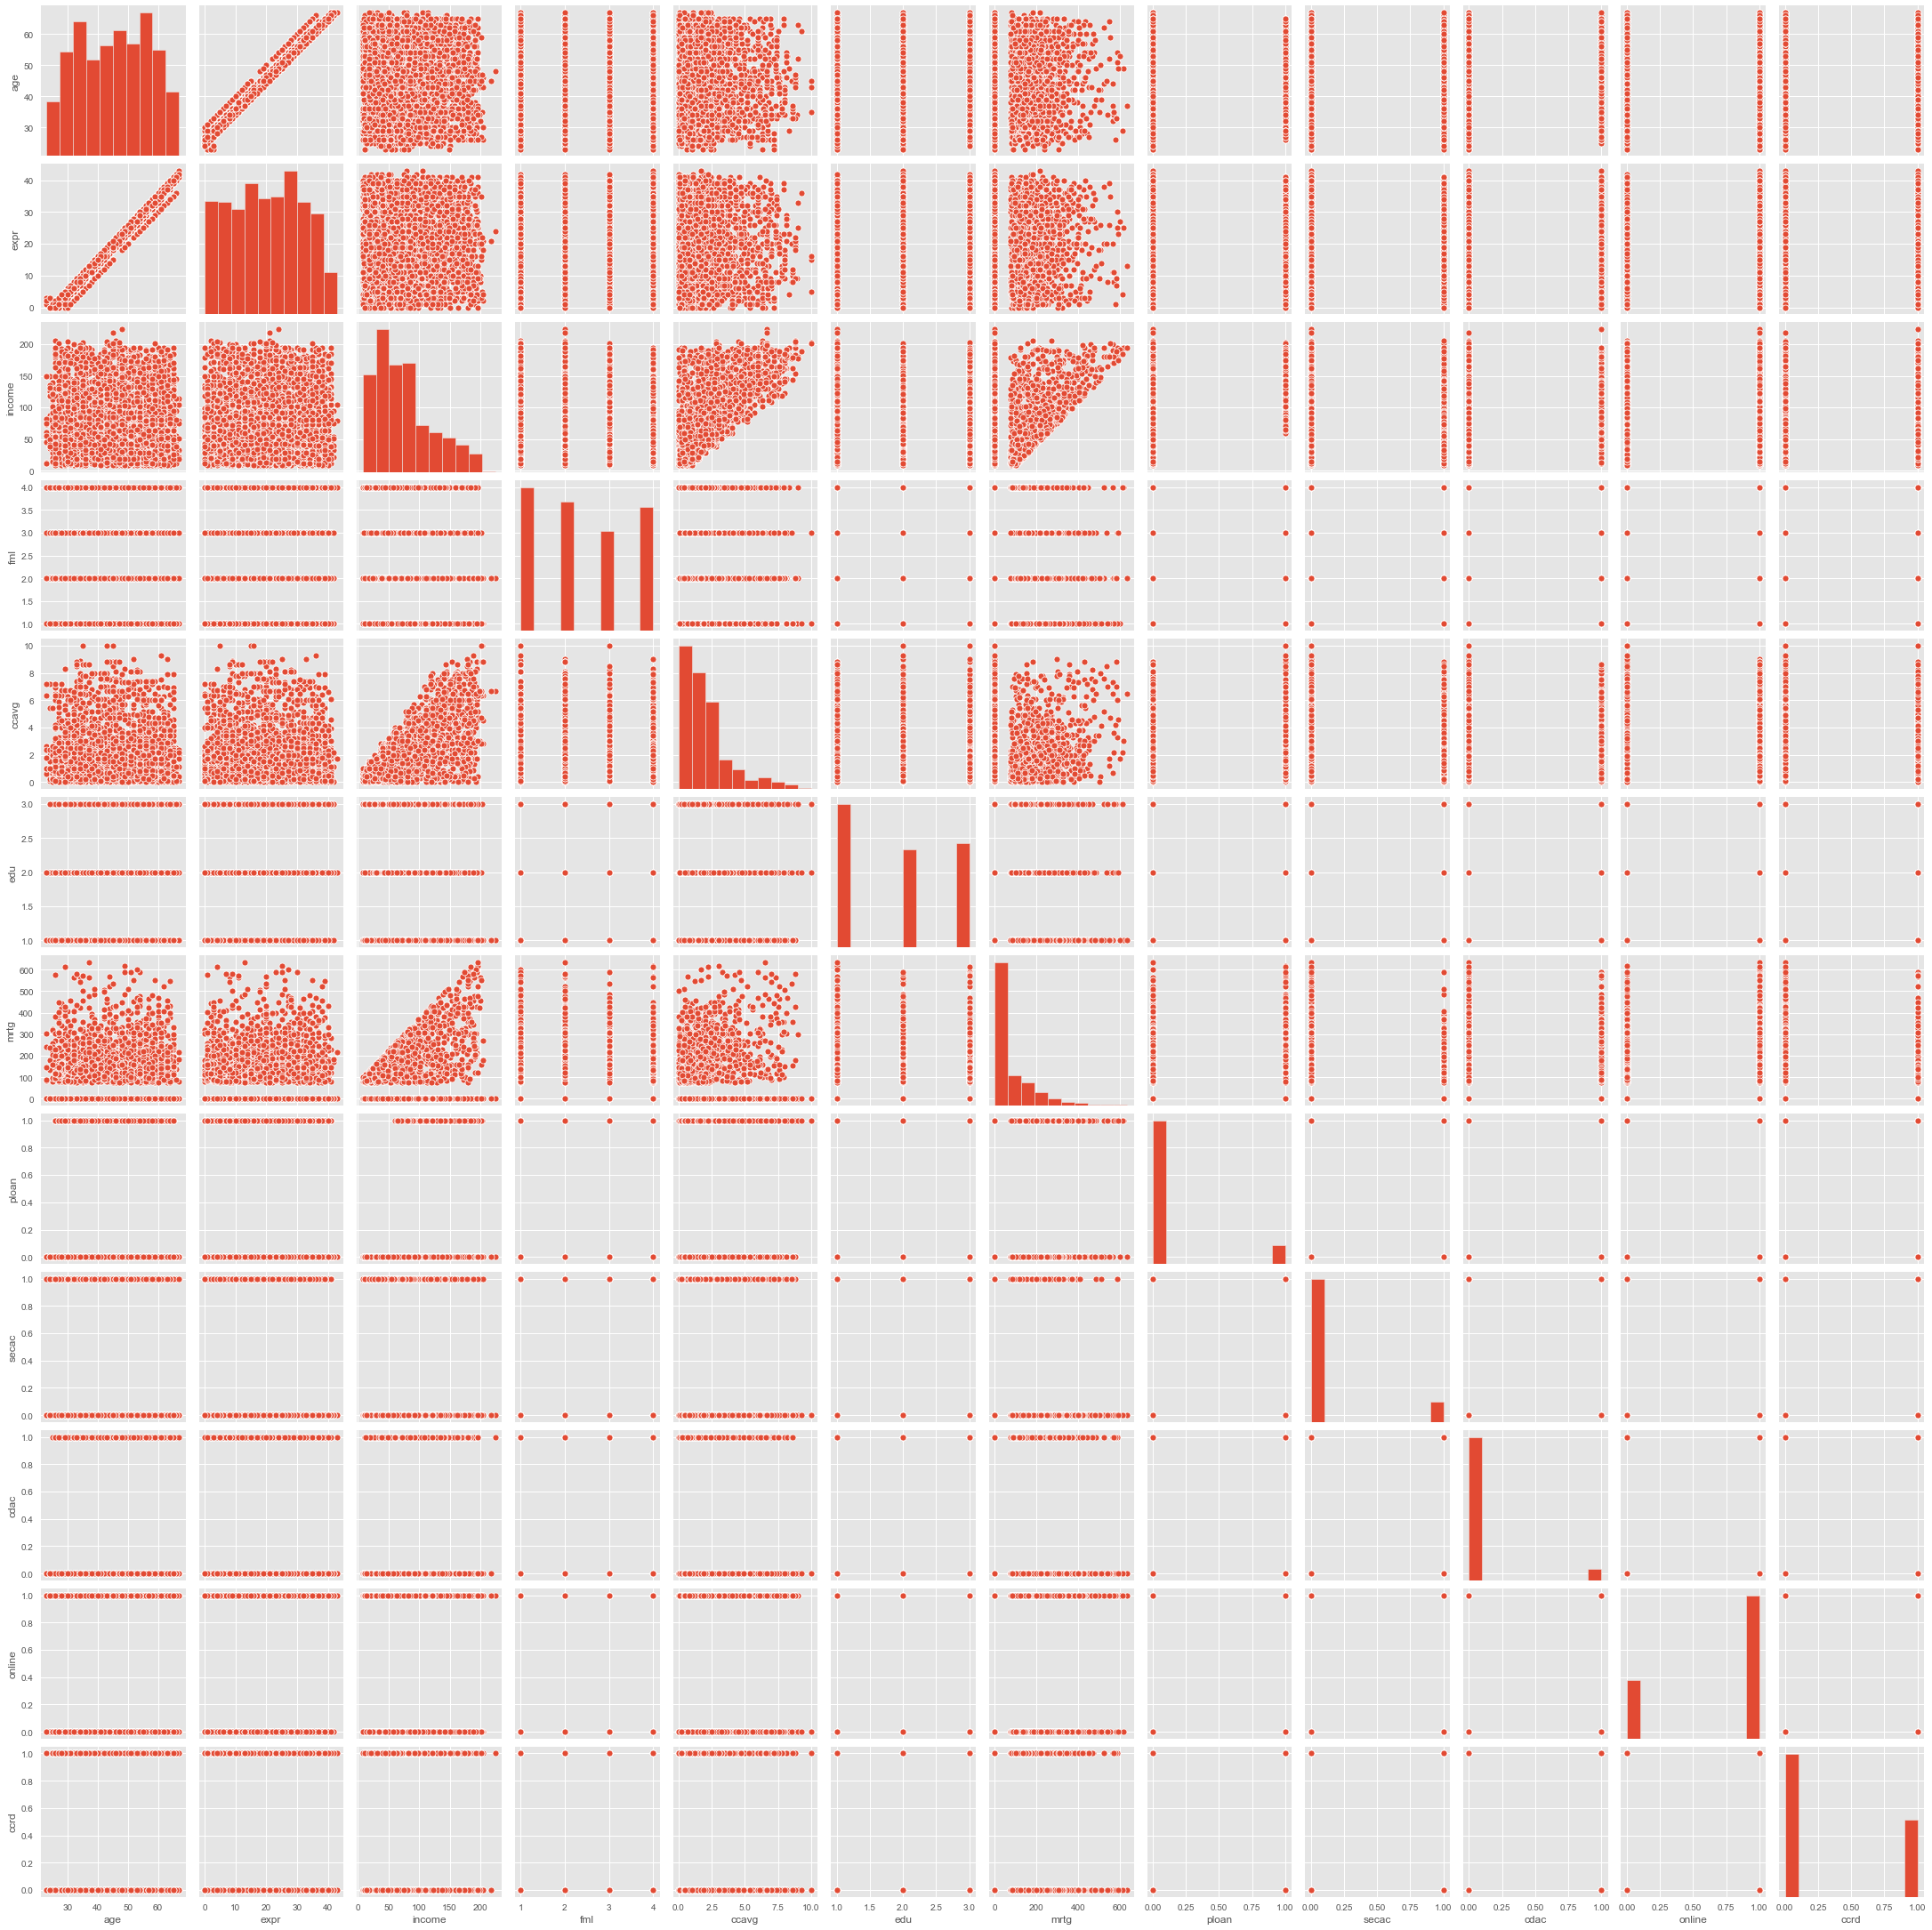

In [594]:
# DO: UniVariate BiVariate analysis
sns.pairplot(ldf5)

In [597]:
# Get Correlation coefficients:
ldf5.corr()

age  expr  income   fml  ccavg   edu  mrtg  ploan  secac  cdac  \
age     1.00  0.99   -0.06 -0.04  -0.05  0.05 -0.02  -0.01  -0.00  0.01   
expr    0.99  1.00   -0.05 -0.05  -0.05  0.02 -0.01  -0.01  -0.00  0.01   
income -0.06 -0.05    1.00 -0.15   0.65 -0.16  0.21   0.54  -0.01  0.18   
fml    -0.04 -0.05   -0.15  1.00  -0.10  0.05 -0.03   0.06   0.02  0.01   
ccavg  -0.05 -0.05    0.65 -0.10   1.00 -0.11  0.11   0.39   0.01  0.14   
edu     0.05  0.02   -0.16  0.05  -0.11  1.00 -0.04   0.15  -0.02  0.01   
mrtg   -0.02 -0.01    0.21 -0.03   0.11 -0.04  1.00   0.11  -0.04  0.06   
ploan  -0.01 -0.01    0.54  0.06   0.39  0.15  0.11   1.00   0.00  0.31   
secac  -0.00 -0.00   -0.01  0.02   0.01 -0.02 -0.04   0.00   1.00  0.31   
cdac    0.01  0.01    0.18  0.01   0.14  0.01  0.06   0.31   0.31  1.00   
online  0.02  0.02   -0.02 -0.01  -0.03 -0.04 -0.16  -0.08  -0.08  0.14   
ccrd    0.01  0.01   -0.02  0.00  -0.02 -0.02 -0.08  -0.04  -0.06  0.26   

        online  ccrd  
age       0.02  0.01  
expr      0.02  0.01  
income   -0.02 -0.02  
fml      -0.01  0.00  
ccavg    -0.03 -0.02  
edu      -0.04 -0.02  
mrtg     -0.16 -0.08  
ploan    -0.08 -0.04  
secac    -0.08 -0.06  
cdac      0.14  0.26  
online    1.00 -0.18  
ccrd     -0.18  1.00

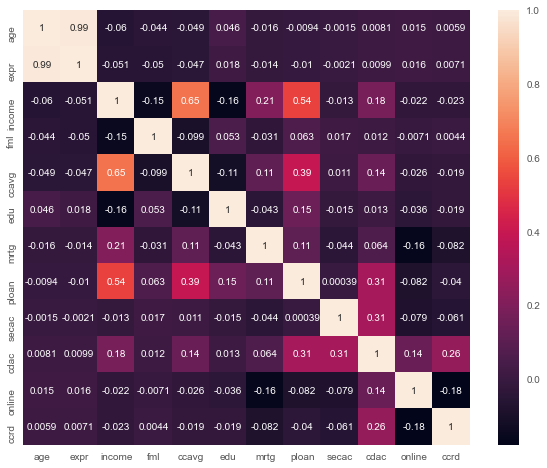

In [598]:
sns.heatmap(ldf5.corr(), annot=True)  # plot the correlation coefficients as a heatmap

### <===== MSB: notebook backup 2 Create 5/29/20 7:44pm =====>

Comments / Justification for Experience column "expr":
Since Experience "expr" is strongly correlated to Age "age" either can be derived/predicted/estimated from each other.
Hence only either "age" or "expr" is needed to train the model. However, it does makes a difference from analysis that 
whether "expr" is or none i.e. "expr" is zero or > zero. Hence instead of removing "expr" column completely, we derive a Categorical feature out of it.

Since what matters is whether the customer HAS Experience or NO i.e. Experience = Yes or No, we will code this column with "0" or "1". "NO Experience" = "0" (expr<1) and "SOME Experience" = "1" (expr>0). Then change "expr" column datatype to "Category".

This will eliminate the redundunt and unneeded correlation between "age" and "expr" and will provide some meaning value (expr = yes / no) for model training.

In [608]:
# Take a backup of processed df so far:
ldf8 = ldf.copy()
type(ldf8)
len(ldf8), len(ldf)  # compare
ldf8.sample(8)  # check

pandas.core.frame.DataFrame

(4188, 4188)

age  expr  income  ccavg  mrtg ploan secac cdac online ccrd  fml_1  \
2382   46    20     185   7.50   428     1     0    0      0    1      0   
677    46    21     204   2.80     0     0     0    0      1    0      0   
1085   51    26      11   0.00     0     0     1    0      0    0      0   
2499   53    27      38   2.80   144     0     1    0      1    0      0   
146    46    19      84   2.67     0     0     0    0      1    1      1   
4455   56    31      28   1.50     0     0     1    1      1    1      1   
1527   57    33      45   1.80   195     0     0    0      0    0      1   
3225   52    28      38   0.90     0     0     0    0      0    1      0   

      fml_2  fml_3  fml_4  edu_1  edu_2  edu_3  
2382      0      0      1      0      1      0  
677       1      0      0      1      0      0  
1085      1      0      0      1      0      0  
2499      0      0      1      0      1      0  
146       0      0      0      0      1      0  
4455      0      0      0      0      1      0  
1527      0      0      0      0      0      1  
3225      0      0      1      0      1      0

1    4137
0      51
Name: expr, dtype: int64

age  expr  income  ccavg  mrtg ploan secac cdac online ccrd  fml_1  \
3915   38     1      91   2.80     0     0     0    0      1    1      1   
422    46     1     145   6.30     0     0     1    1      1    0      0   
341    31     1      55   2.00   185     0     0    0      1    0      0   
3231   62     1      24   0.30     0     0     1    0      1    0      1   
3625   47     1      71   2.90     0     0     0    0      1    0      0   
1448   41     1      49   0.50     0     0     0    0      1    0      0   

      fml_2  fml_3  fml_4  edu_1  edu_2  edu_3  
3915      0      0      0      1      0      0  
422       1      0      0      1      0      0  
341       0      0      1      0      1      0  
3231      0      0      0      0      0      1  
3625      0      0      1      1      0      0  
1448      0      1      0      0      0      1

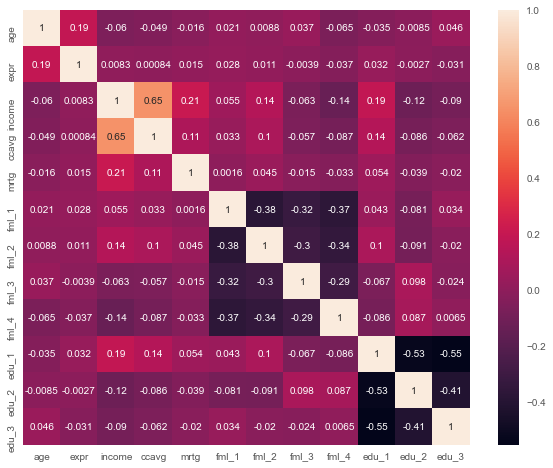

In [612]:
# As per above stated Comments / Justifications: Reduce and create feature out of column "expr"

ldf.expr[ldf.expr > 0] = 1

ldf.expr.value_counts()
ldf.sample(6)

sns.heatmap(ldf.corr(), annot=True)


As we can see from above heatmap that the redundent and unneeded correlation between "age" and "expr" has been eliminated, BUT, yet the same time we have meaningfully retained and factored in the importance / value of Experience "expr" via feature encoding / engineering.

In [614]:
# Change the datatype of the newly encoded/engineered column "expr" from "int64" to "category"

ldf.expr = ldf.expr.astype('category')
ldf.info()

# Take a backup of processed df so far:
ldf9 = ldf.copy()
type(ldf9), len(ldf9), len(ldf)  # compare with current/source working copy of df
ldf9.sample(9)  # check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     4188 non-null   int64   
 1   expr    4188 non-null   category
 2   income  4188 non-null   int64   
 3   ccavg   4188 non-null   float64 
 4   mrtg    4188 non-null   int64   
 5   ploan   4188 non-null   category
 6   secac   4188 non-null   category
 7   cdac    4188 non-null   category
 8   online  4188 non-null   category
 9   ccrd    4188 non-null   category
 10  fml_1   4188 non-null   uint8   
 11  fml_2   4188 non-null   uint8   
 12  fml_3   4188 non-null   uint8   
 13  fml_4   4188 non-null   uint8   
 14  edu_1   4188 non-null   uint8   
 15  edu_2   4188 non-null   uint8   
 16  edu_3   4188 non-null   uint8   
dtypes: category(6), float64(1), int64(3), uint8(7)
memory usage: 377.3 KB


(pandas.core.frame.DataFrame, 4188, 4188)

age expr  income  ccavg  mrtg ploan secac cdac online ccrd  fml_1  \
233    62    1      58   1.70     0     0     0    0      1    0      0   
4639   51    1      33   0.90     0     0     0    0      1    1      0   
2539   32    1      98   4.20   171     1     1    1      0    0      1   
2790   47    1      44   1.40     0     0     0    0      1    1      1   
3648   43    1      38   2.00     0     0     0    0      1    0      0   
2422   58    1     163   0.50   400     0     0    0      0    0      0   
2113   57    1      25   1.00     0     0     0    0      1    0      0   
4916   29    1     123   0.60     0     0     0    0      1    0      0   
1403   32    1      51   0.20   154     0     1    0      0    1      0   

      fml_2  fml_3  fml_4  edu_1  edu_2  edu_3  
233       0      0      1      1      0      0  
4639      0      1      0      0      0      1  
2539      0      0      0      1      0      0  
2790      0      0      0      0      0      1  
3648      0      1      0      0      0      1  
2422      1      0      0      1      0      0  
2113      1      0      0      1      0      0  
4916      1      0      0      1      0      0  
1403      0      0      1      1      0      0

### <====== MSB: Notebook Backup 3 Create 5/29/20 10:09pm ======>

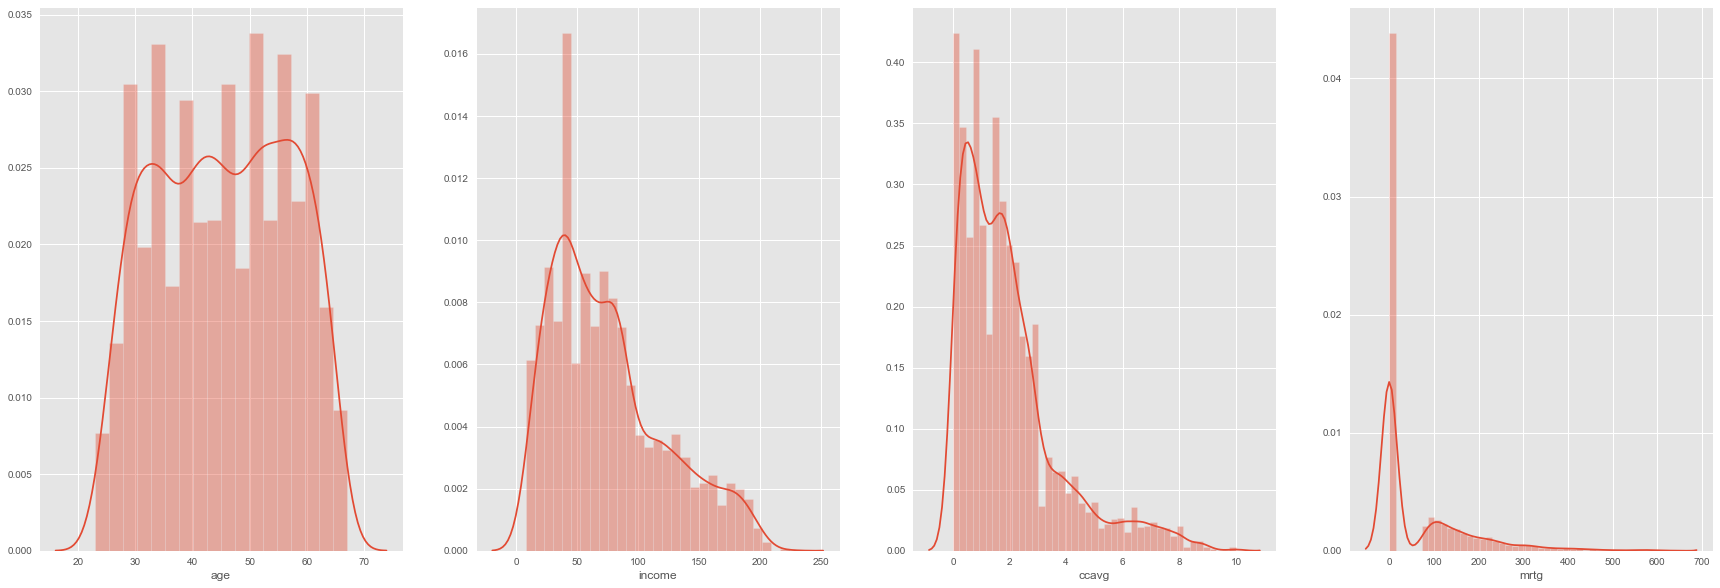

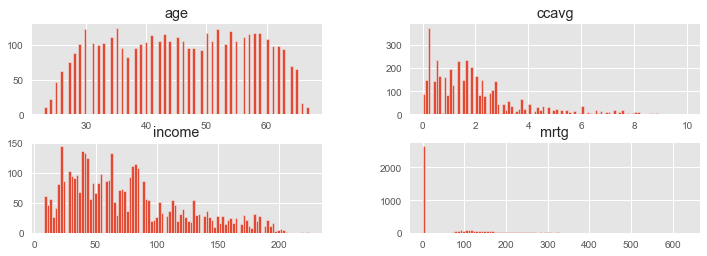

In [627]:
# Histogram of 4 non Categorical columns

fig, axs = plt.subplots(ncols = 4, figsize = (30, 10))

sns.distplot(ldf.age, ax = axs[0])
sns.distplot(ldf.income, ax = axs[1])
sns.distplot(ldf.ccavg, ax = axs[2])
sns.distplot(ldf.mrtg, ax = axs[3])


cols = ['age','income','ccavg','mrtg'] # Select the 4 non Categorical columns
ldf[cols].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 


<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

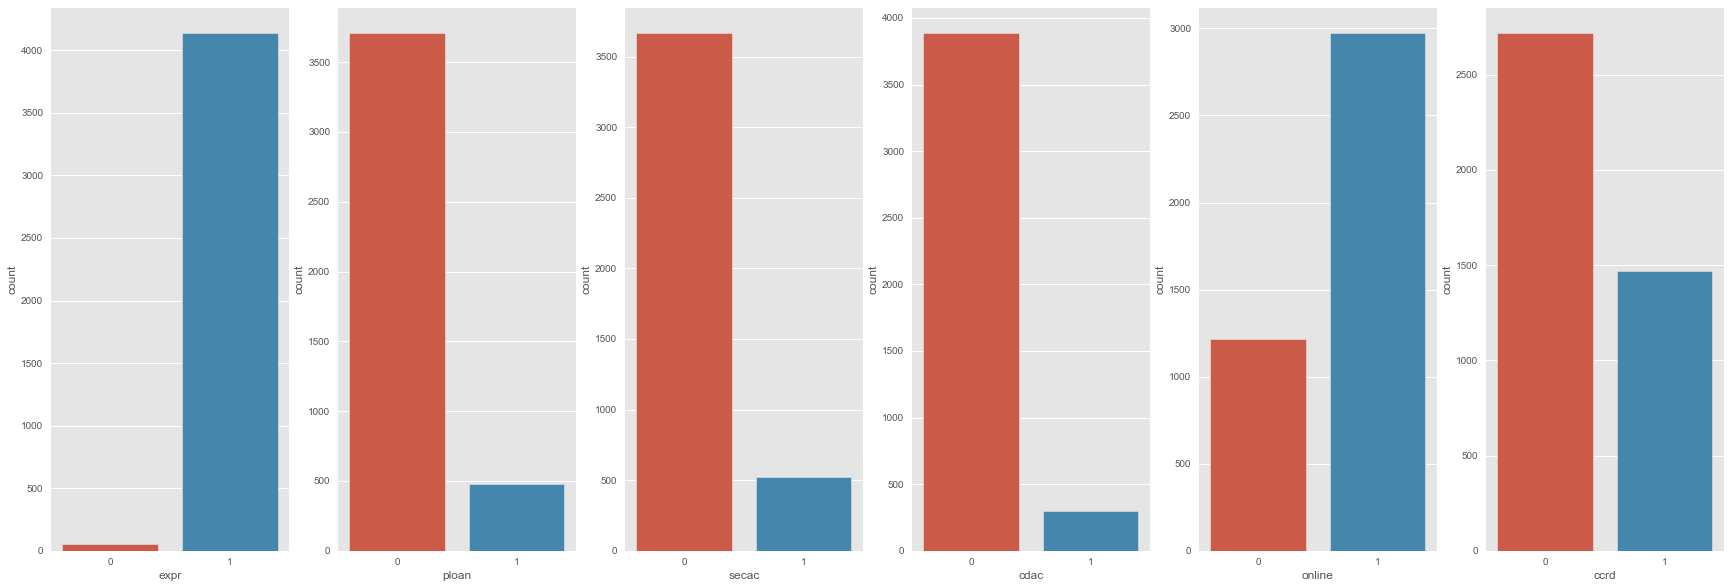

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

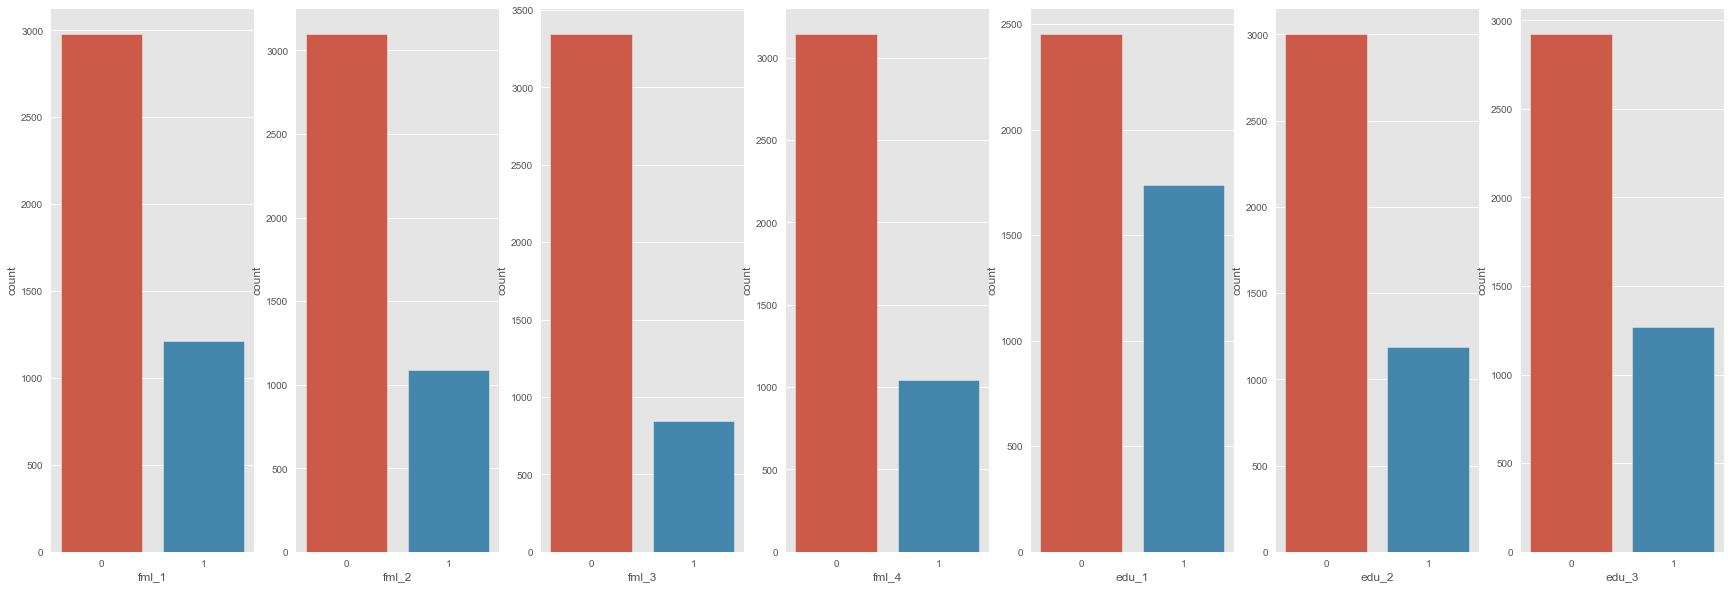

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

In [637]:
# Count Plot of all Categorical columns: Visual value counts of all columns of type 'category'

fig, axs = plt.subplots(ncols = 6, figsize = (30, 10))

j = 0
for i in list(ldf.columns[ldf.dtypes == 'category']): 
    plt.figure(figsize = (4,2))
    sns.countplot(data = ldf, x = i, ax = axs[j] )
    j = j+1

fig, axs = plt.subplots(ncols = 7, figsize = (30, 10))

j = 0
for i in list(ldf.columns[ldf.dtypes == 'uint8']): 
    plt.figure(figsize = (4,2))
    sns.countplot(data = ldf, x = i, ax = axs[j] )
    j = j+1


### Data Model Is Now Ready for Model Training & Training

##### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [643]:
# Split the data into Train and Test sets of 70:30 ratio:

# Define X and Y variables:
X = ldf.drop('ploan',axis=1)     # Predictor feature columns
Y = ldf['ploan']                 # Predicted class (1 = True, 0 = False)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)


In [678]:
# Verify the data split is in the Required Proportion of 70:30 ratio:

ttl = len(X), len(Y)
trn =  len(X_train), len(y_train)
tst = len(X_test), len(y_test)

print('\n* Data split into 70:30 Ratio as Required: See Below:')
print('\n* TRAIN dataset %rows',round(trn[0]*100/ttl[0],2),'%')
print('* TEST  dataset %rows',round(tst[0]*100/ttl[0],2),'%')


# Calc baseline proportion of the Predictor ("ploan") : Data Imbalance: Ratio of Yes ("1") to No ("0")

Yp = ldf['ploan'].value_counts(normalize=True)
print('\n* There is some Class (ploan) Imbalance: 0 = No; 1 = Yes')
print(Yp)

# Calc & Compare Percentages % :
print('\n* Percentage of True/False values of Predictor Class P.Loan:\n')
print("Original P.loan True Values    : {0} ({1:0.2f}%)".format(len(ldf.loc[ldf['ploan'] == 1]), (len(ldf.loc[ldf['ploan'] == 1])/len(ldf.index)) * 100))
print("Original P.loan False Values   : {0} ({1:0.2f}%)".format(len(ldf.loc[ldf['ploan'] == 0]), (len(ldf.loc[ldf['ploan'] == 0])/len(ldf.index)) * 100))
print("")
print("Training P.loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training P.loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test P.loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test P.loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("\n* Percentages seem uniform among Origina, Train, Test datasets")


* Data split into 70:30 Ratio as Required: See Below:

* TRAIN dataset %rows 69.99 %
* TEST  dataset %rows 30.01 %

* There is some Class (ploan) Imbalance: 0 = No; 1 = Yes
0   0.89
1   0.11
Name: ploan, dtype: float64

* Percentage of True/False values of Predictor Class P.Loan:

Original P.loan True Values    : 480 (11.46%)
Original P.loan False Values   : 3708 (88.54%)

Training P.loan True Values    : 322 (10.99%)
Training P.loan False Values   : 2609 (89.01%)

Test P.loan True Values        : 158 (12.57%)
Test P.loan False Values       : 1099 (87.43%)

* Percentages seem uniform among Origina, Train, Test datasets


### <====== MSB: Notebook Backup 4 Create 5/29/20 11:59pm ======>

##### 4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

In [716]:
# Build Logistic Regression Model:

# Fit the model on Train
model2 = LogisticRegression(solver="liblinear", penalty='l2', random_state=3)
model2.fit(X_train, y_train)

# Predict on test
y_predict = model2.predict(X_test)


coef_df = pd.DataFrame(model2.coef_)
coef_df['intercept'] = model2.intercept_
print(coef_df)

# Get the Accuracy (Score) of the Model against Training Data
accScore = model2.score(X_test, y_test)
print("Model2 Score = %f" %(accScore))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

      0     1    2    3     4     5    6     7     8     9    10   11    12  \
0 -0.00 -1.48 0.05 0.13 -0.00 -1.19 3.70 -1.81 -1.70 -1.37 -1.72 0.07 -0.16   

     13    14    15  intercept  
0 -3.05 -0.00 -0.13      -3.18  
Model2 Score = 0.958632


array([[ 119,   39],
       [  11, 1088]])

Predict 1  Predict 0
1        119         39
0         11       1088

<Figure size 792x504 with 0 Axes>

Text(189.52000000000007, 0.5, 'Actual')

Text(0.5, 43.0, 'Predicted')

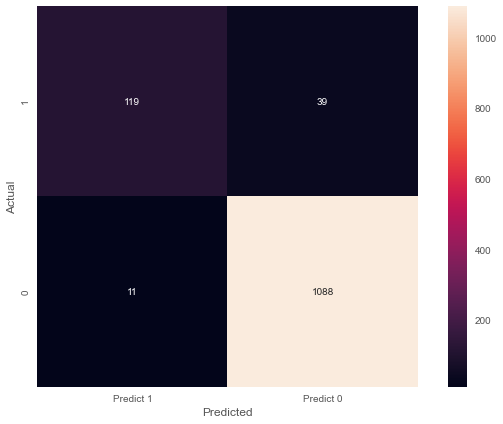

In [696]:
# Build the Confusion Matrix:

cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
cm
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

df_cm
plt.figure(figsize = (11,7))
sns.heatmap(df_cm, annot=True, fmt="d", square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

The confusion matrix Colclusion:

True Positives (TP): Correct Prediction: These customers WILL buy P.Loan = 119

True Negatives (TN): Correct Prediction: These customers WILL NOT buy P.Loan =  1088

False Positives (FP): Incorrect Prediction: These customers WILL buy P.Loan = 11 ("Type I" error)

False Negatives (FN): Incorrect Prediction: These customers WILL NOT buy P.Loan = 39 ("Type II" error)

##### 5. Give your reasoning on how can the model perform better? (10 marks) Hint: Check parameter

In [685]:
# Use Penalty "l1" to improve the model:

# Build Logistic Regression Model:

# Fit the model on Train
model1 = LogisticRegression(solver="liblinear", penalty='l1', random_state=3)
model1.fit(X_train, y_train)

# Predict on test
y_predict = model1.predict(X_test)


coef_df = pd.DataFrame(model1.coef_)
coef_df['intercept'] = model1.intercept_
print(coef_df)

# Get the Accuracy (Score) of the Model against Training Data
accScore = model1.score(X_test, y_test)
print("Model2 Score = %f" %(accScore))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=3, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

     0     1    2    3     4     5    6     7     8     9    10   11   12  \
0 0.00 -0.58 0.06 0.14 -0.00 -1.38 4.26 -1.98 -1.94 -1.31 -1.71 0.18 0.00   

     13   14    15  intercept  
0 -3.30 0.00 -0.08      -4.67  
Model2 Score = 0.960223


### Accuracy Score Improved by 0.16% with "l1" Penalty above

In [688]:
Accuracy = (117+1088)/(117+1088+11+41)
print("Accuracy = %f" %Accuracy)

Accuracy = 0.958632


In [694]:
# Get Other Metrics:

df_pred = pd.DataFrame(y_predict)
print("Recall:",recall_score(y_test,df_pred))
print("Precision:",precision_score(y_test,df_pred))
print("F1 Score:",f1_score(y_test,df_pred))
print("Roc Auc Score:",roc_auc_score(y_test,df_pred))

Recall: 0.7531645569620253
Precision: 0.9153846153846154
F1 Score: 0.826388888888889
Roc Auc Score: 0.8715777288904758


In [703]:
# Generate AUC ROC curves

lg_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
lg_roc_auc


0.8715777288904758

<Figure size 720x576 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

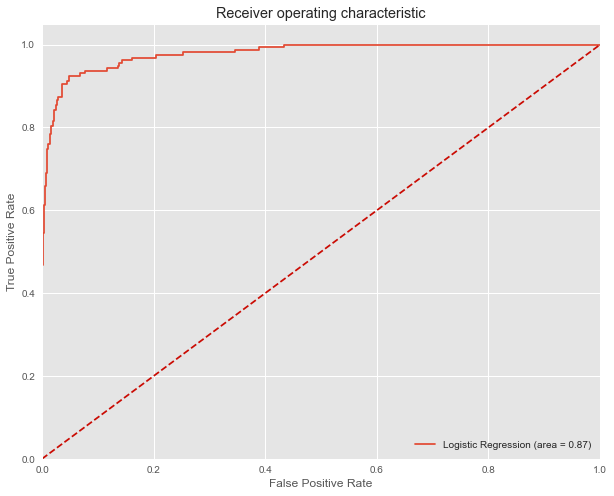

In [704]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [722]:
# Model Improvement: Hyper Parameter Tuning:
# Get Params of logistic regression
model1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': 3,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [727]:
# Loop thru various "solver" to check diff values
# solver can only be used with l2, But 'liblinear' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42, penalty='l2', C = 0.75, solver=i)  
    model_fit =  model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print(train_score)
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
[0.959, 0.956, 0.958, 0.889, 0.885]
[0.959, 0.953, 0.959, 0.881, 0.877]


In [733]:
model = LogisticRegression(random_state=42, penalty='l1', solver='saga')  # changing penalty to l1
model.fit(X_train, y_train)
y_predict = model.predict(X_test)     
print("Trainig accuracy",model.score(X_train,y_train))  
print("Testing accuracy",model.score(X_test, y_test))  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Trainig accuracy 0.8853633572159673
Testing accuracy 0.8774860779634049


In [734]:
model = LogisticRegression(random_state=42, penalty='l1', solver='liblinear')  # changing penalty to l1
model.fit(X_train, y_train)
y_predict = model.predict(X_test)     
print("Trainig accuracy",model.score(X_train,y_train))  
print("Testing accuracy",model.score(X_test, y_test))  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Trainig accuracy 0.9576936199249403
Testing accuracy 0.9594272076372315


### Accuracy improved with "penalty=l1" compared to 'l2' using solver='liblinear'

In [736]:
model = LogisticRegression(random_state=42, solver='liblinear', penalty='l1',class_weight='balanced') # changing class weight to balanced
model.fit(X_train, y_train) 
y_predict = model.predict(X_test)     
print("Trainig accuracy",model.score(X_train,y_train))  
print("Testing accuracy",model.score(X_test, y_test))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Trainig accuracy 0.912316615489594
Testing accuracy 0.9268098647573588


In [738]:
# Loop to check diff Threshold values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42, solver='liblinear', penalty='l1', class_weight='balanced', C=i)  # changing values of C
    model_fit=model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print(train_score)
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]
[0.814, 0.908, 0.913, 0.914, 0.913, 0.912]
[0.827, 0.916, 0.924, 0.927, 0.927, 0.927]


### Best testing accuracy is when for C = 0.50

LogisticRegression(C=0.25, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

<Figure size 792x504 with 0 Axes>

Text(189.52000000000007, 0.5, 'Actual')

Text(0.5, 43.0, 'Predicted')

Here is The FINAL / BEST Model:

Trainig accuracy 0.9133401569430228

Testing accuracy 0.92442322991249

Recall: 0.9367088607594937

Precision: 0.6351931330472103

F1 Score: 0.7570332480818414

Roc Auc Score: 0.9296829108165076

Confusion Matrix:


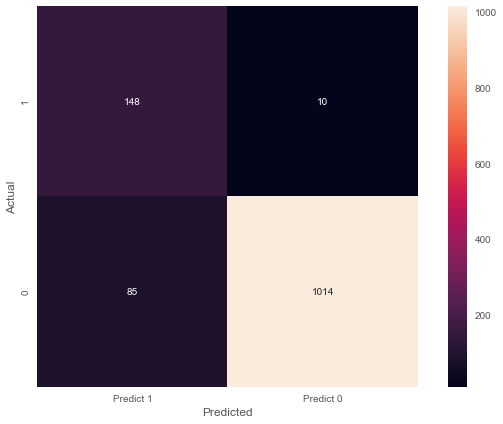

In [747]:
# Hence the Final / Best model is: 
model = LogisticRegression(random_state=42, solver='liblinear', penalty='l1', class_weight='balanced',C=0.25) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
# cm
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# df_cm
plt.figure(figsize = (11,7))
sns.heatmap(df_cm, annot=True, fmt="d", square=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')

print('Here is The FINAL / BEST Model:')
print()
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))
print()
print('Confusion Matrix:')

##### 6. Give Business understanding of your model? (5 marks)

* False Positives and False Negatives (missed) are much less than True Positives, Hence Bank can sell more Personal Loan
* True Negatives are predicted well, which will reduce Bank risks.
* The variable Coeficents tells which variable (feature) / customer aspects contributes most to a successful P.Loan.
* Accordingly, the marketing efforts can target such aspect / profile of a potential customer.


### <====== MSB: Notebook Backup 5 (Final before Submit) Create 5/29/20 11:59pm ======>